In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler

tf.__version__

'2.1.0'

In [47]:
# datasets
titanic = pd.read_csv('./titanic_all_numeric.csv')
mnist = pd.read_csv('./mnist_train.csv', header=None, nrows=2500)

# Understanding model optimization

## Changing optimization parameters

In [19]:
def get_new_model(input_shape):
    model = Sequential()
    
    model.add(Dense(100, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [23]:
predictors = titanic.iloc[:, 1:].to_numpy(float)
target = to_categorical(titanic['survived'])

n_cols = predictors.shape[1]

In [26]:
# create list of learning rates:
lr_to_test = [0.000001, 0.01, 1]

# loop over lr's
for lr in lr_to_test:
    print(f'testing with lr: {lr}')
    
    model = get_new_model(input_shape=n_cols)
    
    model.compile(optimizer=SGD(lr=lr),
                  loss='categorical_crossentropy')
    
    model.fit(predictors, target,
              epochs=10)

testing with lr: 1e-06
Train on 891 samples
Epoch 1/10
891/891 [==============================] - 0s 419us/sample - loss: 1.4978
Epoch 2/10
891/891 [==============================] - 0s 167us/sample - loss: 1.4821
Epoch 3/10
891/891 [==============================] - 0s 152us/sample - loss: 1.4665
Epoch 4/10
891/891 [==============================] - 0s 163us/sample - loss: 1.4511
Epoch 5/10
891/891 [==============================] - 0s 184us/sample - loss: 1.4357
Epoch 6/10
891/891 [==============================] - 0s 153us/sample - loss: 1.4205
Epoch 7/10
891/891 [==============================] - 0s 166us/sample - loss: 1.4057
Epoch 8/10
891/891 [==============================] - 0s 175us/sample - loss: 1.3907
Epoch 9/10
891/891 [==============================] - 0s 148us/sample - loss: 1.3762
Epoch 10/10
891/891 [==============================] - 0s 177us/sample - loss: 1.3617
testing with lr: 0.01
Train on 891 samples
Epoch 1/10
891/891 [==============================] - 0s 459us

# Model validation

## Evaluating model accuracy on validation dataset

In [29]:
# define model arch, compile, and fit
model = get_new_model(input_shape=n_cols)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(predictors, target,
                 epochs=10,
                 validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 1ms/sample - loss: 1.1452 - accuracy: 0.6292 - val_loss: 0.6981 - val_accuracy: 0.6455
Epoch 2/10
623/623 [==============================] - 0s 290us/sample - loss: 0.6874 - accuracy: 0.6003 - val_loss: 0.5442 - val_accuracy: 0.7351
Epoch 3/10
623/623 [==============================] - 0s 284us/sample - loss: 0.6536 - accuracy: 0.6437 - val_loss: 0.6112 - val_accuracy: 0.7388
Epoch 4/10
623/623 [==============================] - 0s 278us/sample - loss: 0.6963 - accuracy: 0.6565 - val_loss: 0.6033 - val_accuracy: 0.7015
Epoch 5/10
623/623 [==============================] - 0s 266us/sample - loss: 0.5877 - accuracy: 0.6902 - val_loss: 0.4892 - val_accuracy: 0.7537
Epoch 6/10
623/623 [==============================] - 0s 266us/sample - loss: 0.5699 - accuracy: 0.6934 - val_loss: 0.5088 - val_accuracy: 0.7463
Epoch 7/10
623/623 [==============================] - 0s 211us/sample - loss: 0.

## Early stopping: Optimizing the optimization

In [30]:
# define model arch, compile, and fit
model = get_new_model(input_shape=n_cols)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# define early stopping callback
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target,
          epochs=30,
          validation_split=0.3,
          callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 1ms/sample - loss: 1.2771 - accuracy: 0.5907 - val_loss: 0.6072 - val_accuracy: 0.6754
Epoch 2/30
623/623 [==============================] - 0s 306us/sample - loss: 0.6470 - accuracy: 0.6421 - val_loss: 0.5606 - val_accuracy: 0.7612
Epoch 3/30
623/623 [==============================] - 0s 303us/sample - loss: 0.6209 - accuracy: 0.6709 - val_loss: 0.5898 - val_accuracy: 0.7164
Epoch 4/30
623/623 [==============================] - 0s 309us/sample - loss: 0.6031 - accuracy: 0.6774 - val_loss: 0.5573 - val_accuracy: 0.7612
Epoch 5/30
623/623 [==============================] - 0s 297us/sample - loss: 0.5948 - accuracy: 0.6934 - val_loss: 0.4989 - val_accuracy: 0.7463
Epoch 6/30
623/623 [==============================] - 0s 296us/sample - loss: 0.6069 - accuracy: 0.6822 - val_loss: 0.5948 - val_accuracy: 0.7164
Epoch 7/30
623/623 [==============================] - 0s 321us/sample - loss: 0.

## Experimenting with wider networks

In [31]:
model_1 = Sequential()

model_1.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
print(model_1.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 22        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model_2 = get_new_model(n_cols)

model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [34]:
print(model_2.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_33 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 202       
Total params: 11,402
Trainable params: 11,402
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model_1_training = model_1.fit(predictors, target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)
model_2_training = model_2.fit(predictors, target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

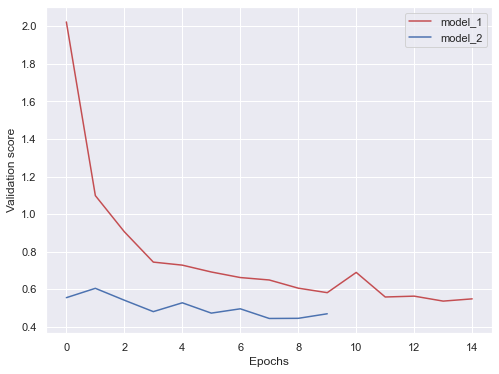

In [37]:
# plot training results
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(model_1_training.history['val_loss'], 'r', label='model_1')
ax.plot(model_2_training.history['val_loss'], 'b', label='model_2')
ax.set(xlabel='Epochs',
       ylabel='Validation score')

plt.legend()
plt.show()

## Adding layers to a network

In [38]:
model_1 = Sequential()

model_1.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model_1.add(Dense(2, activation='softmax'))

model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print(model_1.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model_2 = Sequential()

model_2.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [40]:
model_1_training = model_1.fit(predictors, target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)
model_2_training = model_2.fit(predictors, target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

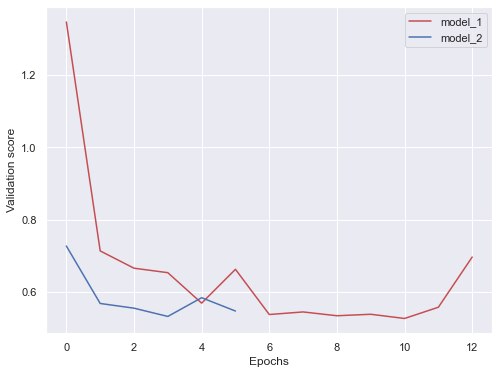

In [41]:
# plot training results
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(model_1_training.history['val_loss'], 'r', label='model_1')
ax.plot(model_2_training.history['val_loss'], 'b', label='model_2')
ax.set(xlabel='Epochs',
       ylabel='Validation score')

plt.legend()
plt.show()

# Thinking about model capacity

# Stepping up to images

In [49]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X = mnist.iloc[:, 1:].to_numpy(float)
y = to_categorical(mnist.iloc[:, 0].to_numpy(float))

mm = MinMaxScaler()
X = mm.fit_transform(X)

In [65]:
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y,
          epochs=30,
          validation_split=0.3,
          callbacks=[early_stopping_monitor])

Train on 1750 samples, validate on 750 samples
Epoch 1/30
1750/1750 [==============================] - 5s 3ms/sample - loss: 1.5964 - accuracy: 0.5349 - val_loss: 0.8637 - val_accuracy: 0.7787
Epoch 2/30
1750/1750 [==============================] - 1s 412us/sample - loss: 0.6342 - accuracy: 0.8337 - val_loss: 0.4908 - val_accuracy: 0.8653
Epoch 3/30
1750/1750 [==============================] - 0s 232us/sample - loss: 0.4161 - accuracy: 0.8891 - val_loss: 0.3961 - val_accuracy: 0.8800
Epoch 4/30
1750/1750 [==============================] - 0s 246us/sample - loss: 0.3155 - accuracy: 0.9149 - val_loss: 0.3257 - val_accuracy: 0.9053
Epoch 5/30
1750/1750 [==============================] - 0s 248us/sample - loss: 0.2538 - accuracy: 0.9320 - val_loss: 0.3188 - val_accuracy: 0.9053
Epoch 6/30
1750/1750 [==============================] - 0s 247us/sample - loss: 0.2081 - accuracy: 0.9480 - val_loss: 0.3131 - val_accuracy: 0.9080
Epoch 7/30
1750/1750 [==============================] - 0s 235us/sa